# Introduction to Regression Analysis

## _Regression:_ (metaphorical) movement to an underlying trend
0. _Regression toward the mean_
1. _Linear regression_ (simple linear, multiple linear, quantile)
2. _Polynomial regression_ (& spline regression)
3. _Non-parametric regression_ (regression trees)
4. _Binomial regression_ (binary, probit, logit/logistical)

In [1]:
# Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


In [2]:
import numpy as np
import pandas as pd
import sklearn               # sklearn is the ML package we will use
import nltk 

import matplotlib.pyplot as plt
import seaborn as sns        # seaborn graphical package
sns.set_style('darkgrid')

In [3]:
# statsmodels.api is for actually looking at
# the regression equation and statistical measures thereof
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Linear Regression: fitting to lines
#### Assumptions:
* continuous values
* a linear relationship
* multivariate normality
* no multicollinearity
* homoskedasticity

Regression can be used for __explanation__, and also for __prediction__:
* explain the overall relationship between predictor variable(s) and outcome variable
* predict individual outcomes for new data
A regression model itself does not prove the direction of causation; conclusions about causation _must_ come from an a priori understanding of the relationship between variables.

In [4]:
# CSV files on GitHub are rendered. Click on "Raw" to get to the raw file. 
# This salary data has cleaner correlation. 
url = "https://raw.githubusercontent.com/csjcode/course-machinelearning-az/master/Machine-Learning-A-Z/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/Salary_Data.csv"
df = pd.read_csv(url)
df.columns = ['years_experience', 'salary']
 
# This salary data is bigger, has more variability. 
url = "https://raw.githubusercontent.com/bokeh/bokeh/master/examples/app/export_csv/salary_data.csv"
df2 = pd.read_csv(url)

In [15]:
df.describe()

,years_experience,salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
df

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
df_line = np.polyfit(df['years_experience'], df['salary'], 1)
# polynomial of degree 1 that minimizes error
df_line 
# first term is coefficient, second is intercept
# the returned vector minimizes residual error

array([ 9449.96232146, 25792.20019867])

In [8]:
df_line2 = np.polyfit(df['salary'], df['years_experience'], 1)
df_line2

array([ 1.01265659e-04, -2.38316056e+00])

In [9]:
np.corrcoef(df_line, df_line2)

array([[ 1., -1.],
       [-1.,  1.]])

* continuous values?
* a linear relationship?
* multivariate normality?
* no multicollinearity?
* homoskedasticity?

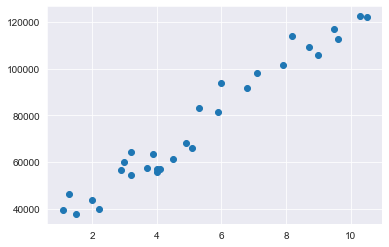

In [16]:
plt.scatter(df['years_experience'], df['salary'])

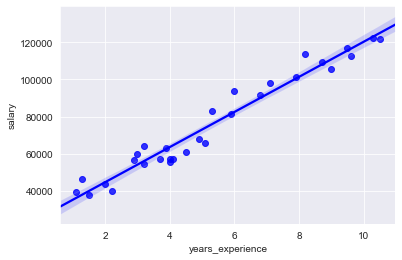

In [19]:
sns.regplot(x=df.years_experience,y=df.salary,color='blue')

### Multiple Linear Regression: fitting to multiple lines(!?)

In [25]:
english = pd.read_csv('../../Class-Exercise-Repo/activity3/english_updated.csv', index_col='Index')

In [26]:
english.describe()

,RTlexdec,RTnaming,Familiarity,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,DerivationalEntropy,InflectionalEntropy,NumberSimplexSynsets,NumberComplexSynsets,...,ConfriendsN,ConffV,ConffN,ConfbV,ConfbN,NounFrequency,VerbFrequency,FrequencyInitialDiphoneWord,FrequencyInitialDiphoneSyllable,CorrectLexdec
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,...,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000
mean,6.550684,6.322843,3.796372,5.020491,0.689445,1.811214,0.536752,1.108217,1.699016,1.562105,...,5.248169,0.415286,1.324193,1.560806,3.912158,607.606736,860.991807,10.366159,10.795004,27.023669
std,0.157538,0.178585,1.154754,1.850710,1.164100,0.824997,0.559080,0.568047,0.672941,1.308853,...,2.082621,0.687585,2.422476,1.124702,3.130107,1885.165188,6767.632169,1.577864,1.593374,4.333091
min,6.205325,6.021751,1.100000,0.000000,-6.553933,0.693147,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.091042,3.367296,1.000000
25%,6.424699,6.149109,2.970000,3.761200,-0.064093,1.098612,0.037530,0.728350,1.098612,0.000000,...,4.127134,0.000000,0.000000,0.693147,0.693147,28.000000,0.000000,9.564372,10.002744,27.000000
50%,6.551223,6.342023,3.700000,4.828314,0.688507,1.609438,0.398240,1.073820,1.609438,1.386294,...,5.476464,0.000000,0.000000,1.386294,4.158883,108.000000,28.000000,10.569058,11.000298,29.000000
75%,6.654417,6.490534,4.570000,6.265301,1.459906,2.302585,0.888440,1.628030,2.197225,2.564949,...,6.632002,0.693147,1.386294,2.564949,6.287859,434.000000,159.000000,11.319947,11.709692,30.000000
max,7.187808,6.695675,6.970000,11.356658,5.630714,5.517453,5.207280,2.451410,4.356709,6.111467,...,10.303035,3.332205,10.347436,4.189655,10.599755,35351.000000,242066.000000,13.924902,13.929620,30.000000


In [28]:
elm = smf.ols("RTlexdec ~ Familiarity + WrittenFrequency", english)

In [29]:
elmf = elm.fit()

In [30]:
print(elmf.summary())

                            OLS Regression Results                            
Dep. Variable:               RTlexdec   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     604.6
Date:                Thu, 20 Feb 2020   Prob (F-statistic):          1.21e-232
Time:                        13:38:37   Log-Likelihood:                 2420.6
No. Observations:                4394   AIC:                            -4835.
Df Residuals:                    4391   BIC:                            -4816.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.7845      0.007  

### Stepwise regression?
* adding/removing one predictor, comparing the resulting model to the original
* rinse, repeat

__Probably don't do this.__
* It encourages brute force solutions, biased toward outliers, etc. (regression to the mean)
* It encourages overfitting to the data
* It discourages thinking about the data
* It inflates (deflates?) p-values: _p-hacking_

In [ ]:
elm2 = smf.ols("RTlexdec ~ Familiarity * WrittenFrequency", english)
elmf2 = elm2.fit()

In [ ]:
print(elmf2.summary())

### Preparing data for machine learning. 
Need to create:
- Input data, which we will call X. 1+ columns of data points ("features"). 
    - We have only 1 "feature", however, which is years of experience.  
- Target data, which we will call y. A series of data points. 
    - Target is salary dollar amount. 

In [ ]:
x = df['years_experience']    # series: lower-case x
X = df[['years_experience']]  # dataframe with only one column. Uppercase X. 
y = df['salary']              # series

In [ ]:
x.head()         # Won't be using these, just for illustration
X.head()         # input feature(s)
y.head()         # output target values

In [ ]:
# sklearn provides a function for splitting data. Randomize on same seed. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
len(X_train)
len(X_test)

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
X_test
y_test

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
X_test[:5]    # test set, years of experience
y_test[:5]    # test set, real salaries
y_pred[:5]    # salaries predicted by regressor
                 # <-- hopefully not too far away from real numbers! 

In [ ]:
dir(regressor)

In [ ]:
regressor.coef_
regressor.get_params()
regressor.intercept_

### Plotting data and prediction
1. On training set
2. On test set

In [ ]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# How about someone with just 0.5 year of experience? How about 15? 
newdf = pd.DataFrame({'years_experience':[0.5, 15]})
newdf
regressor.predict(newdf)